In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [29]:
# Load your dataset
data = pd.read_csv('weed_herbicide_data.csv')

# Define feature variables and target variable
X = data[['Weed_Variety', 'Effectiveness', 'Region']]
y = data['Herbicide_Name']

data.shape

(1000, 6)

In [30]:
# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert boolean values to integers (0 and 1)
X_encoded = X_encoded.astype(int)

# Check data types
print(X_encoded.dtypes)

Weed_Variety_Cyperus rotundus          int32
Weed_Variety_Echinochloa crus-galli    int32
Weed_Variety_Imperata cylindrica       int32
Weed_Variety_Sphenoclea zeylanica      int32
Effectiveness_Low                      int32
Effectiveness_Medium                   int32
Region_Eastern Province                int32
Region_Northern Province               int32
Region_Southern Province               int32
Region_Western Province                int32
dtype: object


In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [32]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [33]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 0.125
              precision    recall  f1-score   support

       2,4-D       0.17      0.10      0.12        51
    Atrazine       0.15      0.29      0.20        31
  Glyphosate       0.11      0.13      0.12        39
        MCPA       0.07      0.05      0.06        43
    Propanil       0.11      0.11      0.11        36

    accuracy                           0.12       200
   macro avg       0.12      0.13      0.12       200
weighted avg       0.12      0.12      0.12       200



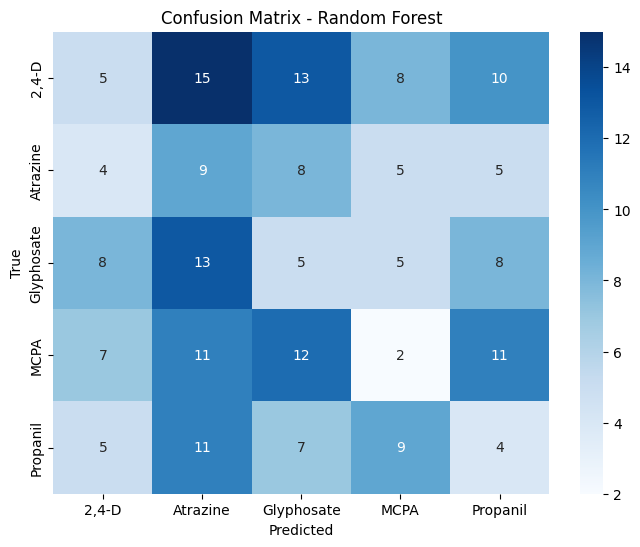

In [34]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
dt_y_pred = dt_model.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_y_pred))

Decision Tree Accuracy: 0.145
              precision    recall  f1-score   support

       2,4-D       0.22      0.24      0.23        51
    Atrazine       0.15      0.29      0.20        31
  Glyphosate       0.12      0.13      0.12        39
        MCPA       0.05      0.02      0.03        43
    Propanil       0.08      0.06      0.07        36

    accuracy                           0.14       200
   macro avg       0.12      0.15      0.13       200
weighted avg       0.13      0.14      0.13       200



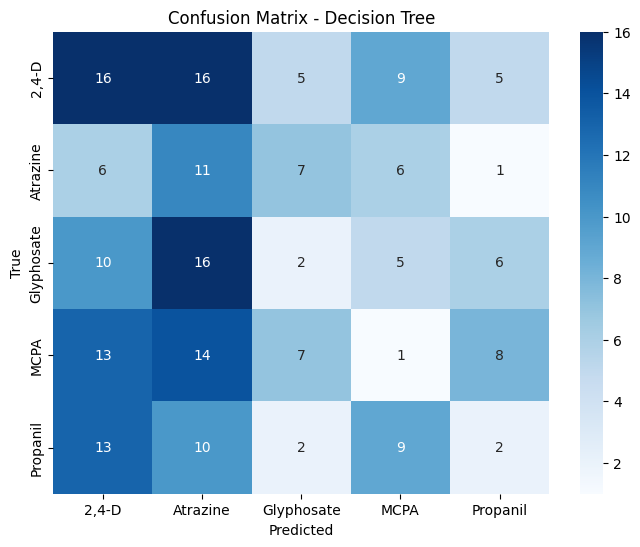

In [8]:
# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)
lr_y_pred = lr_model.predict(X_test)

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_y_pred))

Logistic Regression Accuracy: 0.185
              precision    recall  f1-score   support

       2,4-D       0.20      0.20      0.20        51
    Atrazine       0.16      0.26      0.20        31
  Glyphosate       0.21      0.08      0.11        39
        MCPA       0.23      0.33      0.27        43
    Propanil       0.08      0.06      0.07        36

    accuracy                           0.18       200
   macro avg       0.18      0.18      0.17       200
weighted avg       0.18      0.18      0.17       200



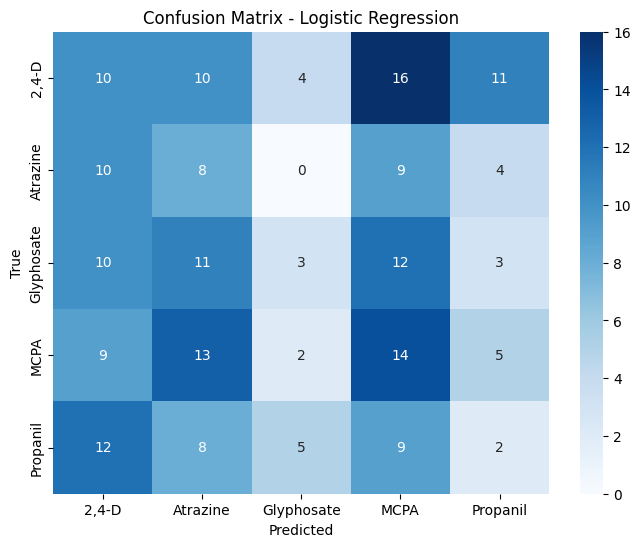

In [37]:
# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Assuming you have your data and models already trained as in the previous code.

# Fit the label encoder on the target variable (Herbicide_Name)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)

# Save the models and label encoder
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Models and label encoder saved successfully.")

Models and label encoder saved successfully.


In [40]:
# Load the models and label encoder
rf_model_loaded = joblib.load('random_forest_model.pkl')
label_encoder_loaded = joblib.load('label_encoder.pkl')

# Example: Make predictions using the loaded model
# Assuming you have a new input DataFrame `X_new` that is preprocessed similarly to X_encoded
x_data = {
    'Weed_Variety': ['Imperata cylindrica'],  # Example weed varieties
    'Effectiveness': ['Low'],             # Example effectiveness levels
    'Region': ['Southern Province'],           # Example regions
}

X_new = pd.DataFrame(x_data)

# One-hot encode the new input
X_new_encoded = pd.get_dummies(X_new, drop_first=True)

# Ensure the same columns as the training data
X_new_encoded = X_new_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Make predictions
rf_predictions = rf_model_loaded.predict(X_new_encoded)

# If you want to decode the labels back to original
rf_predictions_decoded = label_encoder_loaded.inverse_transform(rf_predictions)

print("Random Forest Predictions:", rf_predictions_decoded)

ValueError: y contains previously unseen labels: ['Propanil']